 # Лабораторная работа №4 Проведение исследований со случайным лесом.


## 2. Создание бейзлайна и оценка качества

In [20]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


from collections import Counter


import seaborn as sns
import matplotlib.pyplot as plt

### Классификация

In [2]:
df = pd.read_csv(
    "train.csv"
)

df.head()


/tmp/ipykernel_10028/4101760861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Предобработка.

In [3]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Берем 20000 строк как в 1 лабораторной.

In [4]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)

X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)




Создаем пайплайн и обучаем.

In [ ]:

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [7]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [8]:
y_pred = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.71825
              precision    recall  f1-score   support

        Good       0.62      0.64      0.63       705
        Poor       0.74      0.69      0.71      1175
    Standard       0.74      0.76      0.75      2120

    accuracy                           0.72      4000
   macro avg       0.70      0.70      0.70      4000
weighted avg       0.72      0.72      0.72      4000



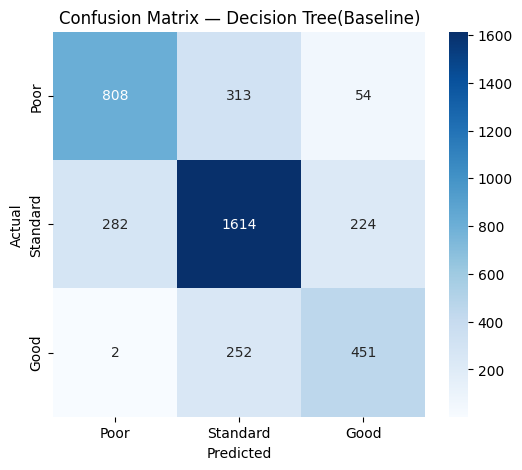

In [9]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Decision Tree(Baseline)')
plt.show()


Хороший результат. Уже на бейзлайне решающий лес показывает качество выше, чем улучшенная логистическая регрессия.

### Регрессия

In [14]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


Предобработка.

In [15]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

Создание пайплайна и обучение.

In [23]:
df_reg_sample = df_reg


X = df_reg_sample.drop('price_usd', axis=1)
y = df_reg_sample['price_usd']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)


In [24]:
rf_baseline = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)


In [25]:
rf_baseline.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [26]:
y_pred = rf_baseline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")



MAE: 9.952
RMSE: 341.944
R2: 0.902


Не очень впечатляющий результат по RMSE и R2, но MAE довольно низкая.

## 3. Улучшение бейзлайна

### Классификация

In [10]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_10028/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Делаем первичную предобработку.

In [11]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Вспомним про гипотезу из первой лабораторной о том, что правильное распределение классов может помочь улучшить качество модели.

In [12]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_10028/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [13]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [14]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [15]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [16]:
y_pred = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.72225
              precision    recall  f1-score   support

        Good       0.70      0.84      0.76      1333
        Poor       0.76      0.77      0.77      1333
    Standard       0.71      0.56      0.62      1334

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000



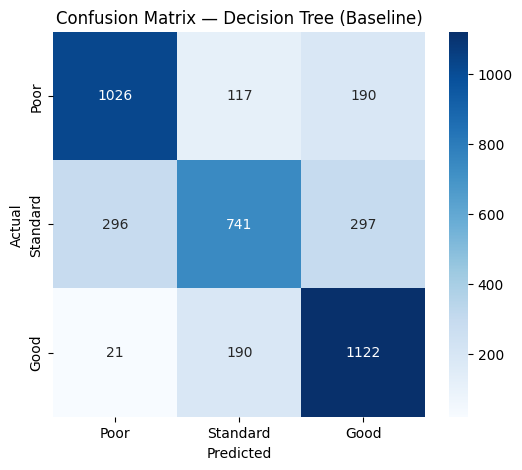

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Decision Tree (Baseline)')
plt.show()


На данный момент имеем лучший рещультат по классификации. Продолжаем анализ.

In [18]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_10028/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Создадим числовой признак из `Credit_History_Age`.

In [19]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# df = df[(df['Credit_History_Age_num'].between(0, 100))]

# df = df[(df['Age'].between(0, 100))]

drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_10028/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [21]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [22]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [23]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [24]:
y_pred = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.72475
              precision    recall  f1-score   support

        Good       0.70      0.85      0.76      1333
        Poor       0.77      0.77      0.77      1333
    Standard       0.71      0.55      0.62      1334

    accuracy                           0.72      4000
   macro avg       0.73      0.72      0.72      4000
weighted avg       0.73      0.72      0.72      4000



Качество улучшилось. Продолжаем.

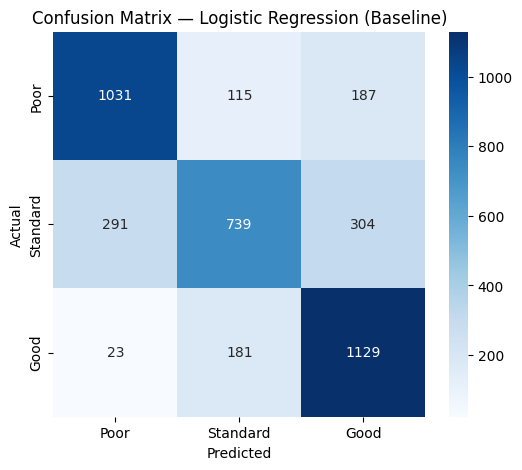

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


In [3]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3439/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [5]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3439/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [6]:
X_sample = df_sample.drop('Credit_Score', axis=1)
y_sample = df_sample['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample,
    test_size=0.2,
    random_state=42,
    stratify=y_sample
)

In [9]:
num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

rf_pipeline = Pipeline(
    steps=[
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier(
            n_estimators=100,
            max_depth=None,
            random_state=42,
            n_jobs=-1
        ))
    ]
)


In [31]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_num'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour'],
      dtype='object'))])),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [32]:
y_pred = rf_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.731
              precision    recall  f1-score   support

        Good       0.71      0.85      0.77      1333
        Poor       0.76      0.77      0.77      1333
    Standard       0.72      0.57      0.64      1334

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



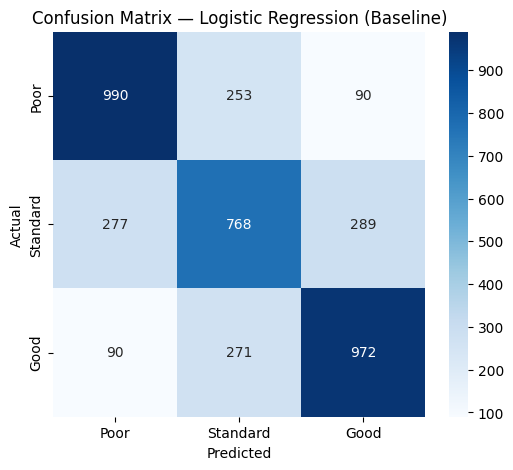

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=['Poor', 'Standard', 'Good'])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Poor', 'Standard', 'Good'],
    yticklabels=['Poor', 'Standard', 'Good']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix — Logistic Regression (Baseline)')
plt.show()


Результат улучшился.

In [10]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_leaf': [1, 5]
}

grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)

print("\nBest CV accuracy:")
print(grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)


print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}

Best CV accuracy:
0.7259656771496455
Test Accuracy: 0.73275
              precision    recall  f1-score   support

        Good       0.71      0.85      0.77      1333
        Poor       0.76      0.78      0.77      1333
    Standard       0.73      0.57      0.64      1334

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



Лучшие параметры: `{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__n_estimators': 200}`. Лучший результат для классификации.

### Регрессия

In [27]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


In [28]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [ ]:
df_reg_sample = df_reg


X = df_reg_sample.drop('price_usd', axis=1)
y = df_reg_sample['price_usd']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],       
    'min_samples_leaf': [1, 2, 4],         
    'max_features': ['auto', 'sqrt', 'log2']  
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',   
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best R2 score on CV:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R2: {r2:.3f}")



In [40]:
print("Best parameters:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred_best = best_tree.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", r2_score(y_test, y_pred_best))


Best parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}
MAE: 9.626364676587327
RMSE: 137.13661961218213
R2: 0.9919566209396924


Хороший результат. Подбор параметров помог сильно улучшить метрики, однако пришлось урезать данные. RMSE, однако, довольно велико. Думаю, есть купные ошибки, которые влияют на метрику.

Пробуем удалить product_type.

In [42]:
drop_cols = ['product_type']

df_reg_sample_n = df_sample.drop(columns=drop_cols)

In [43]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

In [44]:
param_grid = {
    'model__max_depth': [5, 12, None],
    'model__min_samples_leaf': [5, 10],
    'model__min_samples_split': [10, 30]
}

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(
        random_state=42
    ))
])

grid_search = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error', 
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['product_like_count', 'seller_earning', 'buyers_fees',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='igno...
       'should_be_gone', 'product_material', 'product_color', 'seller_badge',
       'has_cross_border_fees', 'warehouse_name', 'usually_ships_within'],
      dtype='object'))])),
                                       ('model',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [5, 12, None],
                         'model__min_samples_leaf': [5, 10],
                         'model__min_samples_split': [10, 30]},
             scoring='neg_mean_absolute_error', verbose=1)

In [45]:
print("Best parameters:")
print(grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_pred_best = best_tree.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("R2:", r2_score(y_test, y_pred_best))


Best parameters:
{'model__max_depth': None, 'model__min_samples_leaf': 5, 'model__min_samples_split': 10}
MAE: 9.612817468253994
RMSE: 137.13528232821298
R2: 0.9919567778085063


Есть небольшое улучшение.

## 4. Имплементация алгоритма машинного обучения 

### Классификация.

In [2]:
class RandomForestClassifierCustom:
    def __init__(
        self,
        n_estimators=50,
        max_features='sqrt',
        random_state=42
    ):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []

    def _get_max_features(self, n_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)

        self.trees = []

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_sample = X[indices]
            y_sample = y[indices]

            tree = DecisionTreeClassifier(max_features=max_features) 
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        X = np.array(X)

        tree_preds = np.array([
            tree.predict(X) for tree in self.trees
        ])

        y_pred = []
        for i in range(X.shape[0]):
            votes = tree_preds[:, i]
            y_pred.append(Counter(votes).most_common(1)[0][0])

        return np.array(y_pred)


In [3]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3270/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Простая предобработка.

In [4]:
drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

Берем 20000 строк случайно.

In [5]:
sample_size = 20000
df_sample = df.sample(n=sample_size, random_state=42)


X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)


X_processed = preprocessor.fit_transform(X)

X_processed = np.array(X_processed)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y.values, test_size=0.2, random_state=42, stratify=y
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [6]:
rf_custom = RandomForestClassifierCustom(
    n_estimators=50,
    max_features='sqrt'
)

rf_custom.fit(X_train, y_train_encoded)



In [7]:
y_pred = rf_custom.predict(X_test)


print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(
    y_test_encoded,
    y_pred,
    target_names=le.classes_
))


Accuracy: 0.707
              precision    recall  f1-score   support

        Good       0.60      0.62      0.61       705
        Poor       0.73      0.68      0.70      1175
    Standard       0.73      0.75      0.74      2120

    accuracy                           0.71      4000
   macro avg       0.69      0.68      0.69      4000
weighted avg       0.71      0.71      0.71      4000



Результат неплохой, хотя он хуже, чем sklearn. Улучшаем.

In [8]:
df = pd.read_csv(
    "train.csv"
)

df.head()

/tmp/ipykernel_3270/3975237315.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
import re

def convert_credit_history(age_str):
    if pd.isna(age_str):
        return None
    match = re.match(r'(\d+)\s*Years\s*and\s*(\d+)?\s*Months', age_str)
    if match:
        years = int(match.group(1))
        months = int(match.group(2)) if match.group(2) else 0
        return years + months / 12
    else:
        return None

df['Credit_History_Age_num'] = df['Credit_History_Age'].apply(convert_credit_history)

df[['Credit_History_Age', 'Credit_History_Age_num']].head()

num_as_obj = [
    'Age',
    'Annual_Income',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in num_as_obj:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[(df['Credit_History_Age_num'].between(0, 100))]

df = df[(df['Age'].between(0, 100))]


drop_cols = [
    'ID',
    'Customer_ID',
    'Name',
    'SSN',
    'Month',
    'Credit_History_Age'
]

df = df.drop(columns=drop_cols)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [10]:
print(df['Credit_Score'].value_counts())

sample_size_per_class = 20000 // df['Credit_Score'].nunique()

df_sample = (
    df.groupby('Credit_Score', group_keys=False)
      .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))
)

print(df_sample['Credit_Score'].value_counts())

Credit_Score
Standard    44748
Poor        24401
Good        14882
Name: count, dtype: int64
Credit_Score
Good        6666
Poor        6666
Standard    6666
Name: count, dtype: int64


/tmp/ipykernel_3270/422736674.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(len(x), sample_size_per_class), random_state=42))


In [11]:
X = df_sample.drop('Credit_Score', axis=1)
y = df_sample['Credit_Score']

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)


X_processed = preprocessor.fit_transform(X)

X_processed = np.array(X_processed)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y.values, test_size=0.2, random_state=42, stratify=y
)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [12]:
rf_custom = RandomForestClassifierCustom(
    n_estimators=50,
    max_features='sqrt'
)

rf_custom.fit(X_train, y_train_encoded)



In [13]:
y_pred = rf_custom.predict(X_test)


print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print(classification_report(
    y_test_encoded,
    y_pred,
    target_names=le.classes_
))



Accuracy: 0.73575
              precision    recall  f1-score   support

        Good       0.72      0.85      0.78      1333
        Poor       0.77      0.79      0.78      1333
    Standard       0.72      0.58      0.64      1334

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.73      4000
weighted avg       0.74      0.74      0.73      4000



Результат лучше, чем в sklearn, отлично.

### Регрессия

In [ ]:
import numpy as np

class DecisionTreeRegressorCustom:
    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  

    def __init__(self, max_depth=5, min_samples_split=10, min_samples_leaf=5):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.root = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        n_samples, n_features = X.shape

        if (
            depth >= self.max_depth
            or n_samples < self.min_samples_split
            or np.unique(y).shape[0] == 1
        ):
            return self.Node(value=np.mean(y))

        best_feature, best_threshold = None, None
        best_mse = float("inf")

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])

            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if (
                    left_mask.sum() < self.min_samples_leaf
                    or right_mask.sum() < self.min_samples_leaf
                ):
                    continue

                y_left = y[left_mask]
                y_right = y[right_mask]

                mse = self._mse(y_left, y_right)

                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is None:
            return self.Node(value=np.mean(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return self.Node(
            feature=best_feature,
            threshold=best_threshold,
            left=left,
            right=right
        )

    def _mse(self, y_left, y_right):
        n = len(y_left) + len(y_right)
        mse_left = np.var(y_left) * len(y_left)
        mse_right = np.var(y_right) * len(y_right)
        return (mse_left + mse_right) / n

    def predict(self, X):
        X = np.array(X)
        return np.array([self._predict_sample(x, self.root) for x in X])

    def _predict_sample(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._predict_sample(x, node.left)
        else:
            return self._predict_sample(x, node.right)


In [47]:
df_reg = pd.read_csv(
    "vestiaire_20k.csv"
)

df_reg.head()

,product_id,product_type,product_name,product_description,product_keywords,product_gender_target,product_category,product_season,product_condition,product_like_count,...,warehouse_name,seller_id,seller_username,usually_ships_within,seller_country,seller_products_sold,seller_num_products_listed,seller_community_rank,seller_num_followers,seller_pass_rate
0,42438630,Wool hat,Wool hat Napapijri Black size 55 cm in Wool,"one size, like new",Napapijri Wool Hats & pull on hats,Men,Men Accessories,Autumn / Winter,Never worn,0.0,...,Tourcoing,25355068,Raffaele25355068,1-2 days,Italy,11.0,27.0,0.0,131.0,100.0
1,30324738,Leather flats,Leather flats Bruno Magli Black size 43.5 EU i...,"Excellent condition! UK size 9.5, EU 43.5",Bruno Magli Leather Flats,Men,Men Shoes,All seasons,Very good condition,6.0,...,Tourcoing,12877585,stelios12877585,NaN,Greece,5.0,2.0,649116.0,5.0,100.0
2,39089334,Polo shirt,Polo shirt LA MARTINA Multicolour size XXL Int...,"La Martina long sleeve polo shirt, size XXL in...",LA MARTINA Cotton Polo shirts,Men,Men Clothing,All seasons,Good condition,2.0,...,Tourcoing,21283960,anneanna21283960,1-2 days,Germany,132.0,90.0,0.0,25.0,95.0
3,39285681,Scarf,Scarf Twinset White in Cotton,Lightweight cotton scarf. White color with 2 h...,Twinset Cotton Scarves,Women,Women Accessories,Autumn / Winter,Very good condition,7.0,...,Tourcoing,15273943,bianca15273943,3-5 days,Italy,5.0,38.0,0.0,7.0,100.0
4,41107394,Leather low trainers,Leather low trainers Tod's Blue size 9.5 UK in...,"Iconic Tod's shoe, dark blue color. Mix suede ...",Tod's Leather Trainers,Men,Men Shoes,All seasons,Good condition,3.0,...,Tourcoing,19395265,Nicchia_20,6-7 days,Italy,4.0,15.0,0.0,163.0,100.0


Простая предобработка.

In [48]:
drop_cols = [
    'product_id', 'product_name', 'product_description', 'brand_url',
    'seller_username', 'brand_name', 'product_keywords', 'seller_id', 'brand_id', 'seller_price' , 'seller_country'
]


df_reg = df_reg.drop(columns=drop_cols)

df_reg = df_reg.dropna(subset=[
    'product_category', 'has_cross_border_fees', 'usually_ships_within'
])

In [49]:

df_reg_sample = df_reg

X_sample = df_reg_sample.drop('price_usd', axis=1)
y_sample = df_reg_sample['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [51]:
tree_reg = DecisionTreeRegressorCustom(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

tree_reg.fit(X_train_scaled, y_train.values)


In [53]:
y_pred = tree_reg.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 59.66846498130478
RMSE: 405.50896994176213
R2: 0.8619585019375341


Результат не впечатляет. Моя реализация решающего дерева оказалась хуже, чем sklearn.

In [56]:
depths = [3, 5, 7]
results = []

for d in depths:
    tree = DecisionTreeRegressorCustom(
        max_depth=d,
        min_samples_split=20,
        min_samples_leaf=10
    )
    tree.fit(X_train_scaled, y_train.values)
    y_pred = tree.predict(X_test_scaled)

    results.append({
        'max_depth': d,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    })

import pandas as pd
results_df = pd.DataFrame(results)
results_df


,max_depth,MAE,RMSE,R2
0,3,167.692212,479.017815,0.807375
1,5,59.668465,405.508970,0.861959
2,7,30.566815,399.421096,0.866072


Получилось неплохо улучшить результат подбором параметров. Лучший результат моя реализация показывает на max_depth = 7.

Пробуем удалить product_type.

In [58]:
drop_cols = ['product_type']

df_reg_sample_n = df_reg_sample.drop(columns=drop_cols)

In [59]:
X_sample = df_reg_sample_n.drop('price_usd', axis=1)
y_sample = df_reg_sample_n['price_usd']

num_cols = X_sample.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_sample.select_dtypes(include=['object', 'bool']).columns

X_train, X_test, y_train, y_test = train_test_split(
    X_sample, y_sample, test_size=0.2, random_state=42
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [60]:
tree_reg = DecisionTreeRegressorCustom(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10
)

tree_reg.fit(X_train_scaled, y_train.values)


In [61]:
y_pred = tree_reg.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2:", r2_score(y_test, y_pred))


MAE: 59.66846498130478
RMSE: 405.50896994176213
R2: 0.8619585019375341


К сожалению, это не помогло улучшить результат.

### Вывод
Решающие деревья sklearn показали лучший результат в классификации, моя реализация не сильно отстала. С регрессией дела похуже: низкая MAE, но при этом высокая RMSE и R2 ниже, чем у линейной регрессии.

| Задача | Бейзлайн | Улучшенный бейзлайн | Моя реализация | Моя реализация улучшенная|
|----------|-------------------------|---------------------------|------------------------|---------------------------|
Классификация (Accuracy)| 0.6468|**0.7218** | 0.6673| 0.7003| |
Регрессия (R2)|0.8963|**0.9920**| 0.8620| 	0.8661| |